In [1]:
# Importing important libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from sklearn import metrics
import seaborn as sns


In [2]:
data_all = pd.read_csv(r'D:\課程\大四下\資料科學應用\paper\tripadvisor_hotel_reviews.csv')

In [3]:
data_all

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
for i in range(len(data_all)):
    if data_all.loc[i,'Rating'] > 2 :
        data_all.loc[i,'sentiment'] = 1
    else:
        data_all.loc[i,'sentiment'] = 0

In [5]:
data_all

,Review,Rating,sentiment
0,nice hotel expensive parking got good deal sta...,4,1.0
1,ok nothing special charge diamond member hilto...,2,0.0
2,nice rooms not 4* experience hotel monaco seat...,3,1.0
3,"unique, great stay, wonderful time hotel monac...",5,1.0
4,"great stay great stay, went seahawk game aweso...",5,1.0
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,1.0
20487,great location price view hotel great quick pl...,4,1.0
20488,"ok just looks nice modern outside, desk staff ...",2,0.0
20489,hotel theft ruined vacation hotel opened sept ...,1,0.0


In [6]:
data_positive_or_not=data_all['sentiment'].value_counts()
data_positive_or_not

1.0    17277
0.0     3214
Name: sentiment, dtype: int64

In [7]:
data_positive_or_not.index=['1','0']
data_positive_or_not

1    17277
0     3214
Name: sentiment, dtype: int64

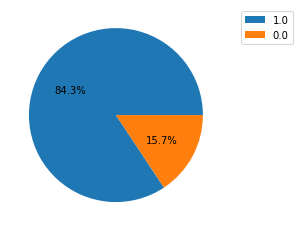

In [8]:
plt.pie(data_all['sentiment'].value_counts(),autopct='%1.1f%%') 
plt.legend(data_all['sentiment'].value_counts().index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

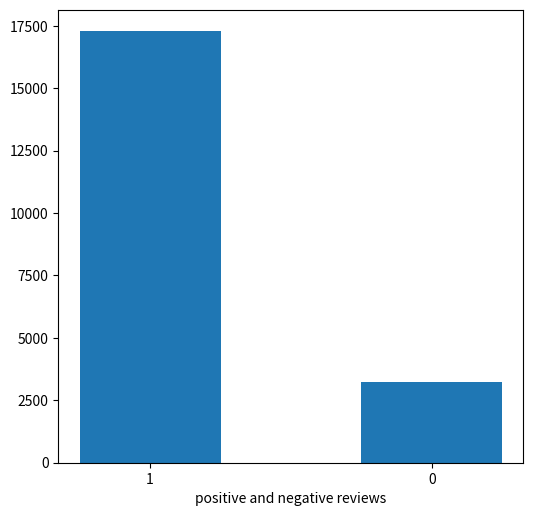

In [9]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize=(6,6),dpi=100)
plt.bar(data_positive_or_not.index,
        data_positive_or_not, 
        width=0.5, 
        bottom=None, 
        align='center', )
#plt.xticks(rotation='vertical')
#plt.title('')
plt.xlabel('positive and negative reviews')
#plt.ylabel('數量',rotation='vertical')
plt.show()

In [10]:
data_rating=data_all['Rating'].value_counts()
data_rating

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

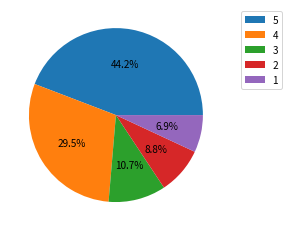

In [11]:
plt.pie(data_rating,autopct='%1.1f%%') 
plt.legend(data_rating.index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

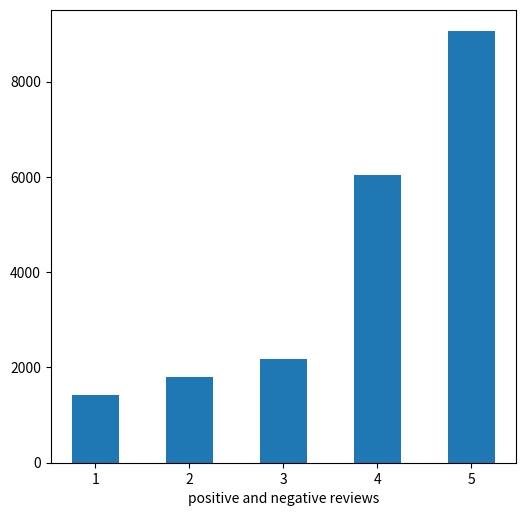

In [12]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize=(6,6),dpi=100)
plt.bar(data_rating.index,
        data_rating, 
        width=0.5, 
        bottom=None, 
        align='center', )
#plt.xticks(rotation='vertical')
#plt.title('')
plt.xlabel('positive and negative reviews')
#plt.ylabel('數量',rotation='vertical')
plt.show()

變balanced data

In [13]:
positive_review=data_all[data_all['sentiment']==1]
negative_review=data_all[data_all['sentiment']==0]

In [14]:
positive_review=positive_review.reset_index(drop=True)
positive_review

,Review,Rating,sentiment
0,nice hotel expensive parking got good deal sta...,4,1.0
1,nice rooms not 4* experience hotel monaco seat...,3,1.0
2,"unique, great stay, wonderful time hotel monac...",5,1.0
3,"great stay great stay, went seahawk game aweso...",5,1.0
4,love monaco staff husband stayed hotel crazy w...,5,1.0
...,...,...,...
17272,great play stay stay loyal inn package deal ha...,5,1.0
17273,great choice wife chose best western quite bit...,5,1.0
17274,good bed clean convenient just night happy sta...,4,1.0
17275,"best kept secret 3rd time staying charm, not 5...",5,1.0


In [15]:
negative_review=negative_review.reset_index(drop=True)
negative_review

,Review,Rating,sentiment
0,ok nothing special charge diamond member hilto...,2,0.0
1,"poor value stayed monaco seattle july, nice ho...",2,0.0
2,horrible customer service hotel stay february ...,1,0.0
3,disappointed say anticipating stay hotel monac...,2,0.0
4,great location need internally upgrade advanta...,2,0.0
...,...,...,...
3209,deceptive staff deceptive desk staff claiming ...,2,0.0
3210,not impressed unfriendly staff checked asked h...,2,0.0
3211,"ok just looks nice modern outside, desk staff ...",2,0.0
3212,hotel theft ruined vacation hotel opened sept ...,1,0.0


In [16]:
positive_review_partial=positive_review[:len(negative_review)]
positive_review_partial

,Review,Rating,sentiment
0,nice hotel expensive parking got good deal sta...,4,1.0
1,nice rooms not 4* experience hotel monaco seat...,3,1.0
2,"unique, great stay, wonderful time hotel monac...",5,1.0
3,"great stay great stay, went seahawk game aweso...",5,1.0
4,love monaco staff husband stayed hotel crazy w...,5,1.0
...,...,...,...
3209,"liked stay time location hotel excellent, walk...",4,1.0
3210,small good price overall hotel clean areas hot...,3,1.0
3211,great place short stay stayed nights attend we...,4,1.0
3212,nice hotel good location family stayed hotel n...,4,1.0


In [17]:
data_all=negative_review.append(positive_review_partial)
data_all=data_all.reset_index(drop=True)
data_all

,Review,Rating,sentiment
0,ok nothing special charge diamond member hilto...,2,0.0
1,"poor value stayed monaco seattle july, nice ho...",2,0.0
2,horrible customer service hotel stay february ...,1,0.0
3,disappointed say anticipating stay hotel monac...,2,0.0
4,great location need internally upgrade advanta...,2,0.0
...,...,...,...
6423,"liked stay time location hotel excellent, walk...",4,1.0
6424,small good price overall hotel clean areas hot...,3,1.0
6425,great place short stay stayed nights attend we...,4,1.0
6426,nice hotel good location family stayed hotel n...,4,1.0


In [18]:
data_positive_or_not=data_all['sentiment'].value_counts()
data_positive_or_not.index=['1','0']
data_positive_or_not

1    3214
0    3214
Name: sentiment, dtype: int64

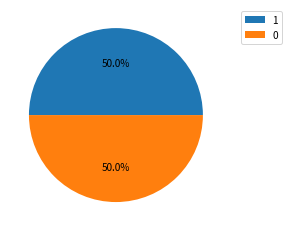

In [19]:
plt.pie(data_positive_or_not,autopct='%1.1f%%') 
plt.legend(data_positive_or_not.index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

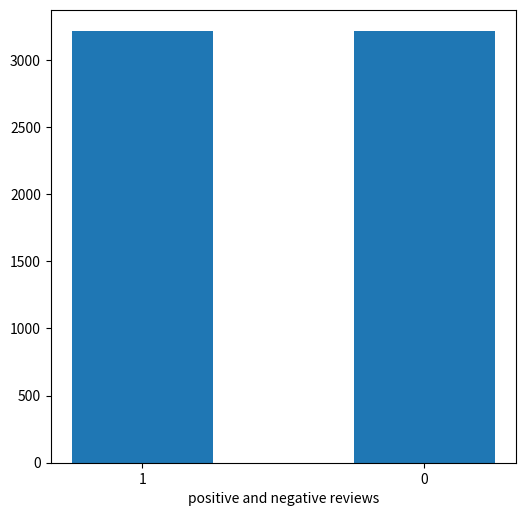

In [20]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize=(6,6),dpi=100)
plt.bar(data_positive_or_not.index,
        data_positive_or_not, 
        width=0.5, 
        bottom=None, 
        align='center', )
#plt.xticks(rotation='vertical')
#plt.title('')
plt.xlabel('positive and negative reviews')
#plt.ylabel('數量',rotation='vertical')
plt.show()

In [21]:
data_rating=data_all['Rating'].value_counts()
data_rating

2    1793
5    1551
1    1421
4    1194
3     469
Name: Rating, dtype: int64

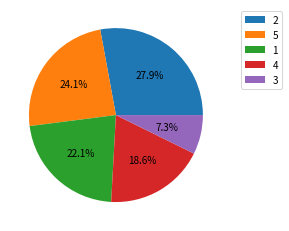

In [22]:
plt.pie(data_rating,autopct='%1.1f%%') 
plt.legend(data_rating.index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

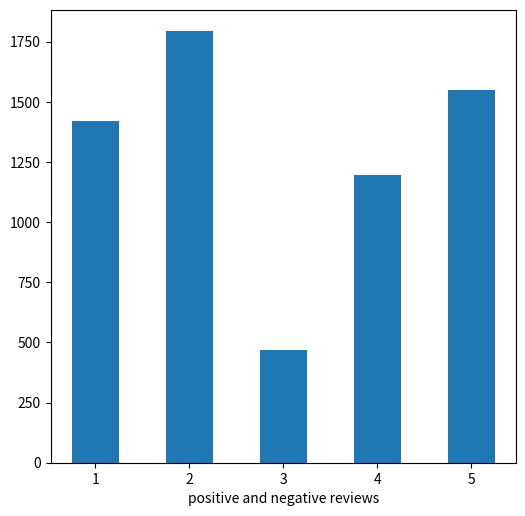

In [23]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize=(6,6),dpi=100)
plt.bar(data_rating.index,
        data_rating, 
        width=0.5, 
        bottom=None, 
        align='center', )
#plt.xticks(rotation='vertical')
#plt.title('')
plt.xlabel('positive and negative reviews')
#plt.ylabel('數量',rotation='vertical')
plt.show()

分train, test data

In [24]:
#打亂 data
np.random.seed(10)
index = np.arange(len(data_all))
np.random.shuffle(index)

In [25]:
data_all=data_all.iloc[index,:].reset_index(drop=True)

In [26]:
int(len(data_all) * 0.8)

5142

In [27]:
train_data = data_all.iloc[:int(len(data_all) * 0.8),]
test_data = data_all.iloc[int(len(data_all) * 0.8):,]

In [28]:
train_data

,Review,Rating,sentiment
0,"not grand hotel booked hotel way advance, give...",2,0.0
1,5 day away just day stay hotel u232 hotel barc...,2,0.0
2,"magnificent hotel heart nyc, second time stayi...",5,1.0
3,outstanding service beautifully renovated hote...,4,1.0
4,carolus hotel- overpriced accomodations carolu...,2,0.0
...,...,...,...
5137,pink black funky modern building great locatio...,4,1.0
5138,great staff beautiful setting just came spendi...,5,1.0
5139,"excellent choice clean comfortable, not beache...",4,1.0
5140,nice beach shabby hotel poor service basically...,2,0.0


In [29]:
test_data=test_data.reset_index(drop=True)
test_data

,Review,Rating,sentiment
0,terrible desk service left tears room hotel ni...,2,0.0
1,fairmont copley plaza better recent weekend sp...,5,1.0
2,"european, year stayed riu jalisco comparing ba...",3,1.0
3,casablanca thee hotel just stayed casablanca h...,5,1.0
4,n't book rooms rambla rooms facing rambla extr...,2,0.0
...,...,...,...
1281,affordable definitely not luxory did not bad e...,2,0.0
1282,"nice rate bed did n't really problem property,...",4,1.0
1283,disappointed service there-the restaurant open...,1,0.0
1284,loved place great base exploring area stayed g...,5,1.0


In [30]:
train_y = np.array(train_data["sentiment"])
test_y=np.array(test_data["sentiment"])

In [31]:
train_y_rating = np.array(train_data["Rating"])
test_y_rating = np.array(test_data["Rating"])

# 資料前處理

In [32]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [33]:
def process(review):
   # review without HTML tags
   review = BeautifulSoup(review).get_text()
   # review without punctuation and numbers
   review = re.sub("[^a-zA-Z]",' ',review)
   # converting into lowercase and splitting to eliminate stopwords
   review = review.lower()
   review = review.split()
   # review without stopwords
   swords = set(stopwords.words("english"))                      # conversion into set for fast searching
   review = [w for w in review if w not in swords]               
   # joining of splitted paragraph by spaces and return
   review_temp = [] 
   for word in review:        
       review_temp.append(lemmatizer.lemmatize(word, pos='a'))
   review = review_temp     
   return(" ".join(review))

In [34]:
#nltk.download('stopwords')

In [35]:
# processing the training data with the help of function defined above
train_x = []
for r in range(len(train_data["Review"])):
    train_x.append(process(train_data["Review"][r]))

In [36]:
test_x = []
for r in range(len(test_data["Review"])):
    test_x.append(process(test_data["Review"][r]))

In [37]:
#處理過的第一個review
train_x[0]

'grand hotel booked hotel way advance given small dark room king bed wall wall paying rate star hotel expected large room hallways need refurbishing staff stiff maybe heat left night stayed lovely hotel simular amenities large room looking arno river free internet access helpful staff cost stayed star hotels felt grand hotel gave little value expensive hotel'

In [38]:
#未處理過的
train_data['Review'][0]

'not grand hotel booked hotel way advance, given small dark room king bed wall wall.we paying rate 5 star hotel expected larger room, hallways need refurbishing.the staff stiff maybe heat.we left night stayed lovely hotel simular amenities larger room looking arno river free internet access helpful staff 25 cost.we stayed 5 star hotels felt grand hotel gave little value expensive hotel,  '

# 讀入positve 和 negative 的 words data

In [39]:
positive_words=[]
f = open(r'D:\課程\大四下\資料科學應用\paper\positive-words.txt')
count=0
for line in f.readlines():
    count+=1
    if(count<37):continue
    else: positive_words.append(line[:-1])
f.close

<function TextIOWrapper.close()>

In [40]:
negative_words=[]
f = open(r'D:\課程\大四下\資料科學應用\paper\negative-words.txt')
count=0
for line in f.readlines():
    count+=1
    if(count<37):continue
    else: negative_words.append(line[:-1])
f.close

<function TextIOWrapper.close()>

In [41]:
positive_words

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordabl

In [42]:
negative_words

['2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 

In [43]:
print(len(positive_words),";",len(negative_words))

2005 ; 4782


# 算hotel review 的 words' 頻率

In [44]:
feature_num=1000 # movie review 常出現的前1000 words

# Initializing the countvectorizer which is a sklearn tool for bag of words
vectorizer = CountVectorizer( max_features = feature_num ).fit(train_x)
train_x= vectorizer.transform(train_x)
train_x= train_x.toarray()

In [45]:
data_words=vectorizer.get_feature_names()
data_words

['able',
 'absolutely',
 'ac',
 'access',
 'activities',
 'actually',
 'add',
 'additional',
 'adequate',
 'adults',
 'advance',
 'advice',
 'advised',
 'advisor',
 'afternoon',
 'agent',
 'ago',
 'agree',
 'air',
 'airport',
 'allowed',
 'alot',
 'amazing',
 'amenities',
 'american',
 'americans',
 'amsterdam',
 'annoying',
 'apparently',
 'appeared',
 'apple',
 'april',
 'area',
 'areas',
 'arrival',
 'arrive',
 'arrived',
 'arriving',
 'ask',
 'asked',
 'asking',
 'ate',
 'atmosphere',
 'attention',
 'attentive',
 'attitude',
 'attractions',
 'available',
 'average',
 'avoid',
 'aware',
 'away',
 'awesome',
 'awful',
 'bad',
 'bag',
 'bags',
 'balcony',
 'bambu',
 'bar',
 'barcelona',
 'barely',
 'bars',
 'bartenders',
 'based',
 'basic',
 'basically',
 'bath',
 'bathroom',
 'bathrooms',
 'bavaro',
 'beach',
 'beaches',
 'beat',
 'beautiful',
 'bed',
 'bedroom',
 'beds',
 'beer',
 'believe',
 'bell',
 'best',
 'beware',
 'big',
 'birthday',
 'bit',
 'block',
 'blocks',
 'blue',
 'bo

In [46]:
data_words_df=pd.DataFrame(train_x)
data_words_df.columns=data_words
data_words_df

,able,absolutely,ac,access,activities,actually,add,additional,adequate,adults,...,world,worn,worth,write,wrong,year,years,yes,york,young
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,2,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5138,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5140,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [47]:
#  test data也轉
test_x= vectorizer.transform(test_x)
# conversion into array
test_x = test_x.toarray()

In [48]:
test_df=pd.DataFrame(test_x)
test_df.columns=data_words
test_df

,able,absolutely,ac,access,activities,actually,add,additional,adequate,adults,...,world,worn,worth,write,wrong,year,years,yes,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


看hotel review前1000常出現的words屬於positive or negative

In [49]:
data_positive_words=[]
data_negative_words=[]
for words in data_words:
    if(words in positive_words):
        data_positive_words.append(words)
    elif(words in negative_words):
        data_negative_words.append(words)
        

In [50]:
data_positive_words

['adequate',
 'amazing',
 'attentive',
 'available',
 'awesome',
 'beautiful',
 'best',
 'charming',
 'clean',
 'clear',
 'clearly',
 'comfortable',
 'comfy',
 'complimentary',
 'convenient',
 'cool',
 'decent',
 'delicious',
 'easy',
 'efficient',
 'enjoy',
 'enjoyable',
 'enjoyed',
 'excellent',
 'fabulous',
 'fair',
 'fairly',
 'fantastic',
 'fast',
 'favorite',
 'fine',
 'free',
 'fresh',
 'friendly',
 'fun',
 'glad',
 'good',
 'gorgeous',
 'grand',
 'great',
 'happy',
 'helped',
 'helpful',
 'hot',
 'impressed',
 'like',
 'liked',
 'love',
 'loved',
 'lovely',
 'luck',
 'luxury',
 'modern',
 'nice',
 'nicely',
 'outstanding',
 'paradise',
 'perfect',
 'pleasant',
 'pleased',
 'polite',
 'positive',
 'pretty',
 'quiet',
 'ready',
 'reasonable',
 'recommend',
 'recommended',
 'right',
 'romantic',
 'safe',
 'smile',
 'soft',
 'spacious',
 'spectacular',
 'strong',
 'super',
 'thank',
 'upgraded',
 'variety',
 'warm',
 'welcome',
 'well',
 'wonderful',
 'work',
 'worked',
 'worth']

In [51]:
data_negative_words

['annoying',
 'awful',
 'bad',
 'beware',
 'bother',
 'break',
 'broken',
 'bug',
 'bugs',
 'cheap',
 'cold',
 'complain',
 'complained',
 'complaint',
 'complaints',
 'crowded',
 'dark',
 'difficult',
 'dirty',
 'disappointed',
 'disappointing',
 'disappointment',
 'disgusting',
 'expensive',
 'fault',
 'filthy',
 'hard',
 'horrible',
 'issue',
 'issues',
 'joke',
 'lack',
 'limited',
 'lost',
 'loud',
 'miss',
 'mistake',
 'musty',
 'negative',
 'noise',
 'noisy',
 'overpriced',
 'picky',
 'poor',
 'pricey',
 'problem',
 'problems',
 'refused',
 'rude',
 'sick',
 'sink',
 'slow',
 'smell',
 'smelled',
 'smoke',
 'sorry',
 'stuck',
 'terrible',
 'tired',
 'trouble',
 'uncomfortable',
 'unfortunately',
 'waste',
 'worn',
 'wrong']

In [52]:
print(len(data_positive_words),len(data_negative_words))

87 65


# 選n個attribute(words)建模

### positive: 5, negative: 5

In [53]:
feature_num=10

In [54]:
top_positive_words=data_words_df[data_positive_words].sum().sort_values(ascending=False)[0:int(feature_num/2)].index
top_nagative_words=data_words_df[data_negative_words].sum().sort_values(ascending=False)[0:int(feature_num/2)].index
top_positive_and_negative_words=top_positive_words.append(top_nagative_words)
top_positive_and_negative_words


Index(['good', 'great', 'nice', 'like', 'clean', 'bad', 'problem', 'noise',
       'hard', 'problems'],
      dtype='object')

In [55]:
training_data=data_words_df[top_positive_and_negative_words]
testing_data=test_df[top_positive_and_negative_words]

In [56]:
training_data

,good,great,nice,like,clean,bad,problem,noise,hard,problems
0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,2,0,0,0
2,0,3,2,0,0,0,0,0,0,0
3,1,4,0,1,0,0,1,1,0,0
4,0,0,2,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5137,1,1,0,0,0,0,0,0,0,0
5138,4,2,1,1,1,0,0,0,0,0
5139,0,0,0,0,2,0,0,0,0,0
5140,1,0,1,2,0,0,0,0,0,0


In [57]:
testing_data

,good,great,nice,like,clean,bad,problem,noise,hard,problems
0,0,0,2,0,0,1,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0
2,0,0,3,1,0,1,0,0,0,0
3,1,2,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1281,3,1,1,1,2,1,1,0,0,0
1282,1,4,4,1,0,0,1,0,0,0
1283,1,0,0,0,0,0,0,0,0,0
1284,0,6,1,1,0,0,0,0,1,0


In [58]:
#decision tree
model_tree=DecisionTreeClassifier(max_depth = 3,criterion="entropy")
model_tree.fit(training_data, train_y)
prediction_tree = model_tree.predict(testing_data)
metrics.accuracy_score(prediction_tree, test_y)

0.723950233281493

[Text(558.0, 951.3000000000001, 'great <= 0.5\nentropy = 1.0\nsamples = 5142\nvalue = [2572, 2570]\nclass = negative'),
 Text(279.0, 679.5, 'bad <= 0.5\nentropy = 0.916\nsamples = 2788\nvalue = [1864, 924]\nclass = negative'),
 Text(139.5, 407.70000000000005, 'clean <= 0.5\nentropy = 0.967\nsamples = 2084\nvalue = [1264, 820]\nclass = negative'),
 Text(69.75, 135.89999999999998, 'entropy = 0.92\nsamples = 1506\nvalue = [1001, 505]\nclass = negative'),
 Text(209.25, 135.89999999999998, 'entropy = 0.994\nsamples = 578\nvalue = [263, 315]\nclass = positive'),
 Text(418.5, 407.70000000000005, 'nice <= 1.5\nentropy = 0.604\nsamples = 704\nvalue = [600, 104]\nclass = negative'),
 Text(348.75, 135.89999999999998, 'entropy = 0.518\nsamples = 612\nvalue = [541, 71]\nclass = negative'),
 Text(488.25, 135.89999999999998, 'entropy = 0.942\nsamples = 92\nvalue = [59, 33]\nclass = negative'),
 Text(837.0, 679.5, 'bad <= 0.5\nentropy = 0.882\nsamples = 2354\nvalue = [708, 1646]\nclass = positive'),
 

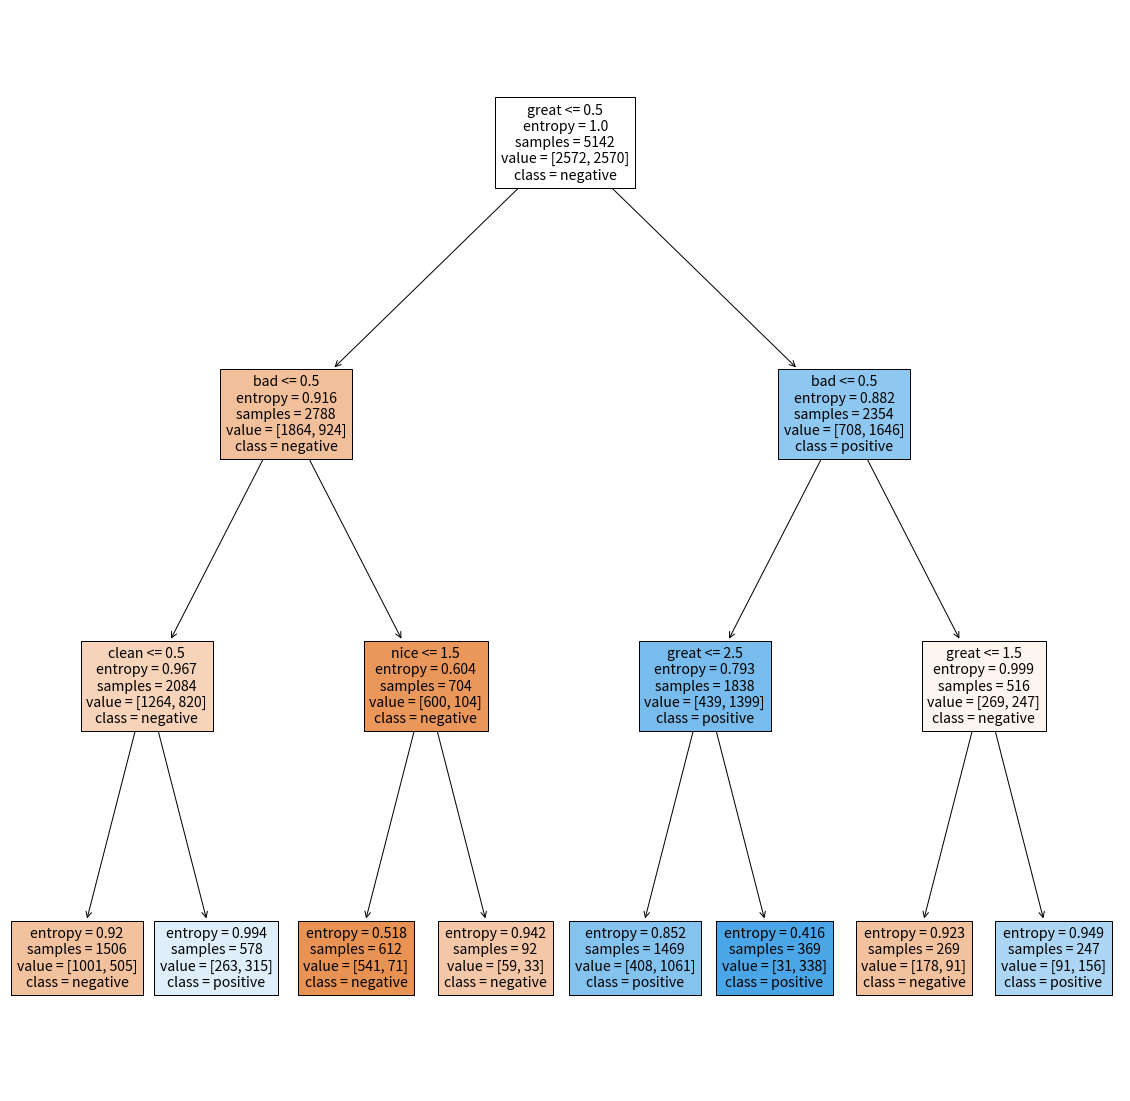

In [59]:
from sklearn import tree
#tree.plot_tree(model_tree,top_positive_and_negative_words,list(str(train_y)),filled=True)
plt.subplots(figsize = (20,20))
tree.plot_tree(model_tree,feature_names =top_positive_and_negative_words, 
               class_names=['negative','positive'],
               filled = True)

In [60]:
from sklearn.naive_bayes import MultinomialNB
model_NB =MultinomialNB()
model_NB.fit(training_data, train_y)
prediction_NB = model_NB.predict(testing_data)
metrics.accuracy_score(prediction_NB, test_y)

0.7130637636080871

In [61]:
from sklearn.naive_bayes import MultinomialNB
model_NB =MultinomialNB()
model_NB.fit(training_data, train_y)
prediction_NB = model_NB.predict(testing_data)
metrics.accuracy_score(prediction_NB, test_y)

0.7130637636080871

In [62]:
prediction_rating_NB = model_NB.predict_proba(testing_data)

In [63]:
prediction_rating_NB=pd.DataFrame(prediction_rating_NB)
prediction_rating_NB

,0,1
0,0.680822,0.319178
1,0.559898,0.440102
2,0.717520,0.282480
3,0.155683,0.844317
4,0.500194,0.499806
...,...,...
1281,0.683010,0.316990
1282,0.022779,0.977221
1283,0.530154,0.469846
1284,0.006819,0.993181


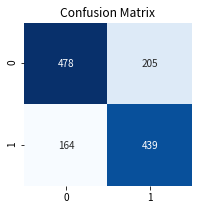

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix(prediction_NB, test_y), 
      cmap="Blues", annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.show()

In [65]:
from sklearn.naive_bayes import GaussianNB
model_GNB =GaussianNB()
model_GNB.fit(training_data, train_y)
prediction_GNB = model_GNB.predict(testing_data)
metrics.accuracy_score(prediction_GNB, test_y)

0.7013996889580093

In [66]:
# random forest
model_rf = RandomForestClassifier(n_estimators = 1000)
model_rf.fit(training_data, train_y)
prediction_rf = model_rf.predict(testing_data)
metrics.accuracy_score(prediction_rf, test_y)

0.7223950233281493

In [67]:
from sklearn.svm import SVC
# SVM
model_SVM = SVC()
model_SVM.fit(training_data, train_y)
prediction_SVM = model_SVM.predict(testing_data)
metrics.accuracy_score(prediction_SVM, test_y)

0.7301710730948678

In [68]:
from xgboost import XGBClassifier
model_XGB=XGBClassifier()
model_XGB.fit(training_data, train_y)
prediction_XGB = model_XGB.predict(testing_data)
metrics.accuracy_score(prediction_XGB, test_y)

C:\Users\jackp\Anaconda3\envs\demo\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:53:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7309486780715396

In [69]:
train_y

array([0., 0., 1., ..., 1., 0., 1.])

DNN using binary_crossentropy (one label)

In [70]:
from tensorflow.keras import callbacks

model_mckp = callbacks.ModelCheckpoint(r'D:\課程\大四下\資料科學應用\paper\model\DNN.h5',
                      monitor='val_accuracy',
                      save_best_only=True)

earlystop = callbacks.EarlyStopping(monitor='val_loss',
                    patience=5,
                    verbose=1)


callbacks_list = [model_mckp, earlystop]

In [71]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout


model = Sequential()
model.add(Dense(64, input_dim=feature_num))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x=training_data,  y=train_y, validation_split=0.2,epochs=20, batch_size=16,shuffle=True,callbacks=callbacks_list) 

Epoch 1/20
258/258 [==============================] - 1s 5ms/step - loss: 0.6064 - accuracy: 0.6922 - val_loss: 0.5681 - val_accuracy: 0.6997
Epoch 2/20
258/258 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7109 - val_loss: 0.5681 - val_accuracy: 0.7017
Epoch 3/20
258/258 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7124 - val_loss: 0.5732 - val_accuracy: 0.7036
Epoch 4/20
258/258 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7182 - val_loss: 0.5641 - val_accuracy: 0.6987
Epoch 5/20
258/258 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7223 - val_loss: 0.5686 - val_accuracy: 0.7153
Epoch 6/20
258/258 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7202 - val_loss: 0.5637 - val_accuracy: 0.7104
Epoch 7/20
258/258 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7233 - val_loss: 0.5644 - val_accuracy: 0.7114
Epoch 

In [80]:
prediction_DNN=model.predict(testing_data)
prediction_DNN

array([[0.3569616 ],
       [0.30031174],
       [0.42986673],
       ...,
       [0.255246  ],
       [0.9663049 ],
       [0.38210994]], dtype=float32)

In [85]:
rating=prediction_DNN*5
rating

array([[1.784808 ],
       [1.5015588],
       [2.1493337],
       ...,
       [1.2762301],
       [4.8315244],
       [1.9105496]], dtype=float32)

In [87]:
DNN_rating=pd.DataFrame(rating)
DNN_rating

,0
0,1.784808
1,1.501559
2,2.149334
3,3.859515
4,1.413165
...,...
1281,2.454626
1282,4.498505
1283,1.276230
1284,4.831524


In [94]:
#DNN
DNN_rating=round(DNN_rating)
for i in range(len(DNN_rating)):
    if(DNN_rating.iloc[i,0]==0):
        DNN_rating.iloc[i,0]=1
DNN_rating.describe()

,0
count,1286.000000
mean,2.325816
std,1.275474
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


In [92]:
#DNN
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(test_y_rating, rating))
rmse

1.5114439734579521

In [79]:
DNN_prediction=pd.DataFrame(prediction_DNN)
DNN_prediction

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
1281,0.0
1282,1.0
1283,0.0
1284,1.0


In [78]:
for i in range(len(DNN_prediction)):
    if(DNN_prediction.iloc[i,0]>=0.5):DNN_prediction.iloc[i,0]=1
    else: DNN_prediction.iloc[i,0]=0
        
DNN_prediction

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
1281,0.0
1282,1.0
1283,0.0
1284,1.0


In [93]:
metrics.accuracy_score(DNN_prediction, test_y)

0.7410575427682737

RMSE for rating

In [1639]:
rating_NB=round(prediction_rating_NB[1]*5)
for i in range(len(rating_NB)):
    if(rating_NB[i]==0):
        rating_NB[i]=1
rating_NB.describe()

count    1286.000000
mean        2.601089
std         1.299613
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: 1, dtype: float64

In [1640]:
#naive bayes
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(rating_NB, test_y_rating))
rmse

1.442522414929443

In [95]:
#DNN
rmse = math.sqrt(mean_squared_error(test_y_rating,DNN_rating))
rmse

1.5068531885627756

In [1643]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    for i in range(len(actual)):
        if actual[i]==0: actual[i]=0.00001
    return np.mean(np.abs((actual - pred) / actual)) 

In [1644]:
mape(rating_NB, test_y_rating)

0.5405909797822707

In [1645]:
mape(test_y_rating, rating)

0.493556938677885

### positive: 10, negative: 10

In [96]:
feature_num=20

In [97]:
top_positive_words=data_words_df[data_positive_words].sum().sort_values(ascending=False)[0:int(feature_num/2)].index
top_nagative_words=data_words_df[data_negative_words].sum().sort_values(ascending=False)[0:int(feature_num/2)].index
top_positive_and_negative_words=top_positive_words.append(top_nagative_words)
top_positive_and_negative_words

Index(['good', 'great', 'nice', 'like', 'clean', 'friendly', 'beautiful',
       'best', 'right', 'free', 'bad', 'problem', 'noise', 'hard', 'problems',
       'expensive', 'dirty', 'poor', 'cheap', 'disappointed'],
      dtype='object')

In [98]:
training_data=data_words_df[top_positive_and_negative_words]
testing_data=test_df[top_positive_and_negative_words]

In [99]:
#decision tree
model_tree=DecisionTreeClassifier(max_depth = 3,criterion="entropy")
model_tree.fit(training_data, train_y)
prediction_tree = model_tree.predict(testing_data)
metrics.accuracy_score(prediction_tree, test_y)

0.7177293934681181

In [100]:
from sklearn.naive_bayes import MultinomialNB
model_NB =MultinomialNB()
model_NB.fit(training_data, train_y)
prediction_NB = model_NB.predict(testing_data)
metrics.accuracy_score(prediction_NB, test_y)

0.7597200622083982

In [101]:
prediction_rating_NB = model_NB.predict_proba(testing_data)
prediction_rating_NB=pd.DataFrame(prediction_rating_NB)
prediction_rating_NB

,0,1
0,0.298680,0.701320
1,0.293984,0.706016
2,0.848005,0.151995
3,0.151156,0.848844
4,0.500194,0.499806
...,...,...
1281,0.588912,0.411088
1282,0.020101,0.979899
1283,0.738305,0.261695
1284,0.002887,0.997113


In [102]:
from sklearn.naive_bayes import GaussianNB
model_GNB =GaussianNB()
model_GNB.fit(training_data, train_y)
prediction_GNB = model_GNB.predict(testing_data)
metrics.accuracy_score(prediction_GNB, test_y)

0.6998444790046656

In [103]:
# random forest
model_rf = RandomForestClassifier(n_estimators = 1000)
model_rf.fit(training_data, train_y)
prediction_rf = model_rf.predict(testing_data)
metrics.accuracy_score(prediction_rf, test_y)

0.744945567651633

In [104]:
from sklearn.svm import SVC
# SVM
model_SVM = SVC()
model_SVM.fit(training_data, train_y)
prediction_SVM = model_SVM.predict(testing_data)
metrics.accuracy_score(prediction_SVM, test_y)

0.7581648522550545

In [105]:
from xgboost import XGBClassifier
model_XGB=XGBClassifier()
model_XGB.fit(training_data, train_y)
prediction_XGB = model_XGB.predict(testing_data)
metrics.accuracy_score(prediction_XGB, test_y)

C:\Users\jackp\Anaconda3\envs\demo\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.76049766718507

DNN

In [106]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout


model = Sequential()
model.add(Dense(64, input_dim=feature_num))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [107]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x=training_data,  y=train_y, validation_split=0.2,epochs=20, batch_size=16,shuffle=True,callbacks=callbacks_list)  

Epoch 1/20
258/258 [==============================] - 1s 2ms/step - loss: 0.5924 - accuracy: 0.6958 - val_loss: 0.5270 - val_accuracy: 0.7415
Epoch 2/20
258/258 [==============================] - 1s 3ms/step - loss: 0.5236 - accuracy: 0.7445 - val_loss: 0.5038 - val_accuracy: 0.7502
Epoch 3/20
258/258 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.7479 - val_loss: 0.5061 - val_accuracy: 0.7473
Epoch 4/20
258/258 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7603 - val_loss: 0.4980 - val_accuracy: 0.7541
Epoch 5/20
258/258 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.7586 - val_loss: 0.4980 - val_accuracy: 0.7532
Epoch 6/20
258/258 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7681 - val_loss: 0.4968 - val_accuracy: 0.7609
Epoch 7/20
258/258 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7664 - val_loss: 0.5027 - val_accuracy: 0.7532
Epoch 

In [108]:
prediction_DNN=model.predict(testing_data)

In [109]:
DNN_prediction=pd.DataFrame(prediction_DNN)
DNN_prediction

,0
0,0.854809
1,0.633835
2,0.368078
3,0.766157
4,0.207611
...,...
1281,0.588672
1282,0.896806
1283,0.155075
1284,0.984460


In [110]:
rating=DNN_prediction*5
rating

,0
0,4.274047
1,3.169177
2,1.840388
3,3.830785
4,1.038054
...,...
1281,2.943361
1282,4.484028
1283,0.775376
1284,4.922302


In [111]:
for i in range(len(DNN_prediction)):
    if(DNN_prediction.iloc[i,0]>=0.5):DNN_prediction.iloc[i,0]=1
    else: DNN_prediction.iloc[i,0]=0
        
DNN_prediction

,0
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
1281,1.0
1282,1.0
1283,0.0
1284,1.0


In [112]:
metrics.accuracy_score(DNN_prediction, test_y)

0.7713841368584758

RMSE for Rating

In [1664]:
rating_NB=round(prediction_rating_NB[1]*5)
for i in range(len(rating_NB)):
    if(rating_NB[i]==0):
        rating_NB[i]=1
rating_NB.describe()

count    1286.000000
mean        2.727061
std         1.428776
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: 1, dtype: float64

In [1665]:
#naive bayes
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(rating_NB, test_y_rating))
rmse

1.3168367772728051

In [113]:
#DNN
rmse = math.sqrt(mean_squared_error(test_y_rating, rating))
rmse

1.4647422988019096

### positive: 18, negative: 18

In [114]:
feature_num=36

In [115]:
top_positive_words=data_words_df[data_positive_words].sum().sort_values(ascending=False)[0:int(feature_num/2)].index
top_nagative_words=data_words_df[data_negative_words].sum().sort_values(ascending=False)[0:int(feature_num/2)].index
top_positive_and_negative_words=top_positive_words.append(top_nagative_words)
top_positive_and_negative_words

Index(['good', 'great', 'nice', 'like', 'clean', 'friendly', 'beautiful',
       'best', 'right', 'free', 'recommend', 'helpful', 'excellent',
       'comfortable', 'wonderful', 'pretty', 'hot', 'work', 'bad', 'problem',
       'noise', 'hard', 'problems', 'expensive', 'dirty', 'poor', 'cheap',
       'disappointed', 'rude', 'cold', 'terrible', 'sick', 'noisy', 'horrible',
       'smell', 'loud'],
      dtype='object')

畫words數量

In [116]:
data_words_df[top_positive_words]

,good,great,nice,like,clean,friendly,beautiful,best,right,free,recommend,helpful,excellent,comfortable,wonderful,pretty,hot,work
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
2,0,3,2,0,0,0,0,0,2,1,1,0,2,1,0,0,0,0
3,1,4,0,1,0,0,2,2,0,0,0,0,1,0,2,0,0,0
4,0,0,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5137,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5138,4,2,1,1,1,1,1,1,2,0,0,1,0,0,0,0,1,0
5139,0,0,0,0,2,1,0,0,0,0,0,0,1,2,0,0,0,0
5140,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [117]:
data_words_df[top_positive_words].sum()

good           5277
great          4391
nice           3390
like           2525
clean          2136
friendly       1449
beautiful      1317
best           1306
right          1069
free           1013
recommend      1011
helpful         987
excellent       890
comfortable     842
wonderful       765
pretty          745
hot             744
work            700
dtype: int64

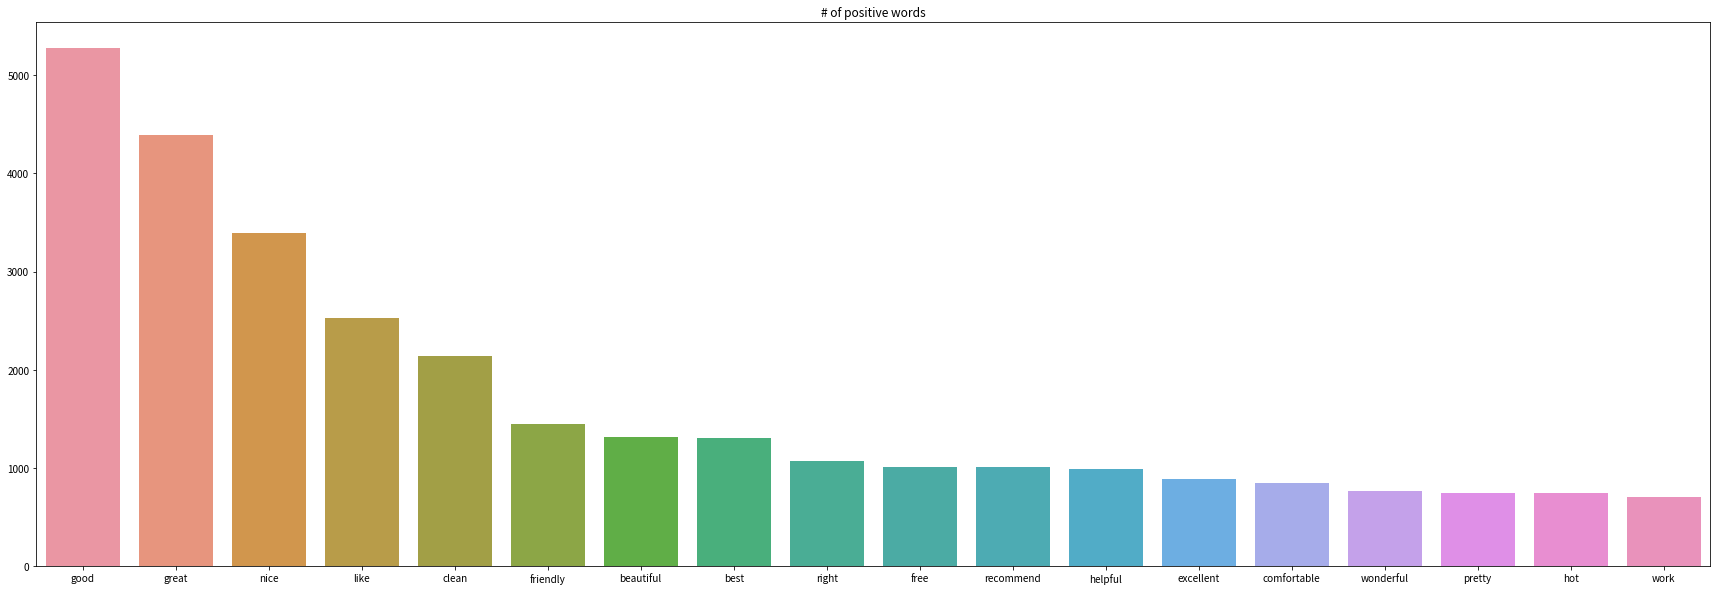

In [118]:
plt.figure(figsize=(30, 10))
sns.barplot(x=data_words_df[top_positive_words].sum().index,y=data_words_df[top_positive_words].sum()).set_title('# of positive words')
#plt.xlabel('不同產品別的處理次數')
#plt.ylabel('數量',rotation='vertical')
plt.show()

In [119]:
data_words_df[top_nagative_words].sum()

bad             1733
problem          909
noise            619
hard             553
problems         543
expensive        498
dirty            456
poor             445
cheap            445
disappointed     426
rude             419
cold             415
terrible         388
sick             379
noisy            345
horrible         345
smell            306
loud             255
dtype: int64

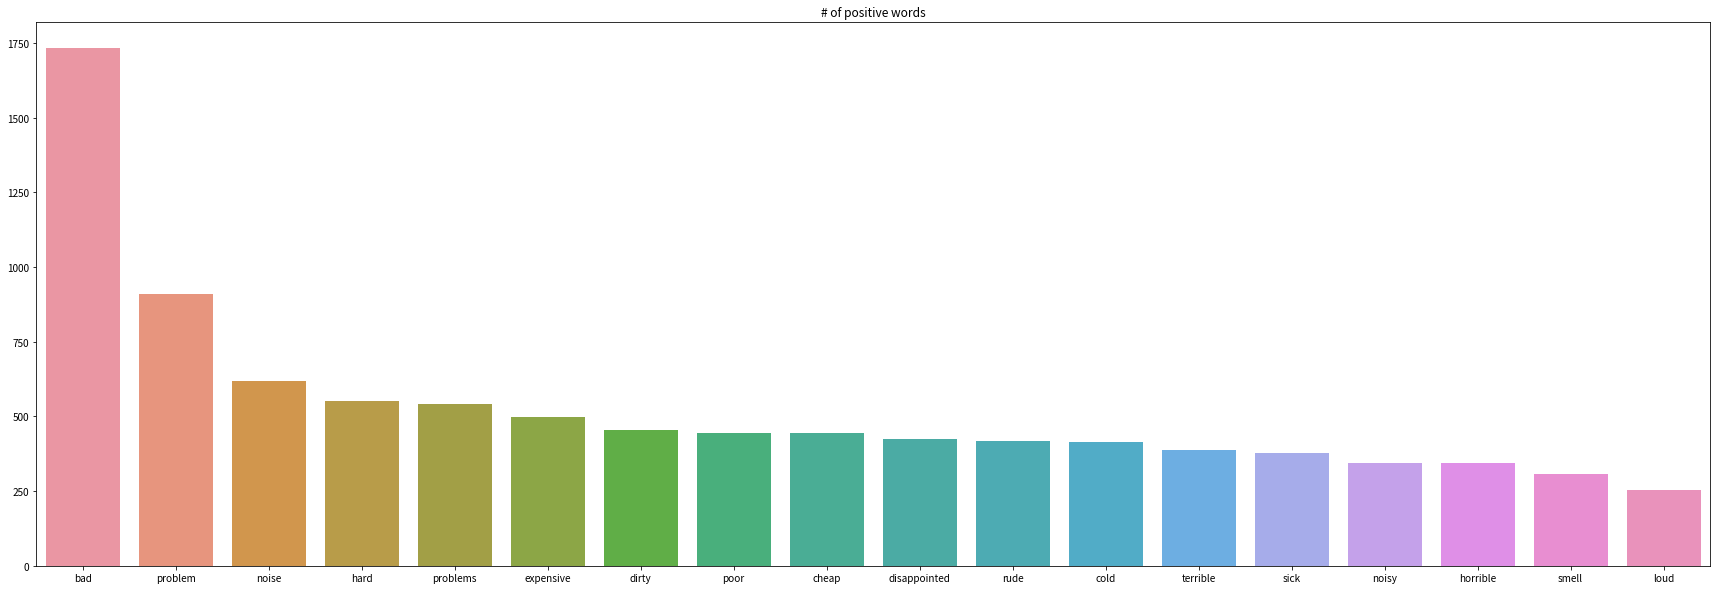

In [120]:
plt.figure(figsize=(30, 10))
sns.barplot(x=data_words_df[top_nagative_words].sum().index,y=data_words_df[top_nagative_words].sum()).set_title('# of positive words')
#plt.xlabel('不同產品別的處理次數')
#plt.ylabel('數量',rotation='vertical')
plt.show()

In [121]:
training_data=data_words_df[top_positive_and_negative_words]
testing_data=test_df[top_positive_and_negative_words]

In [122]:
#decision tree
model_tree=DecisionTreeClassifier(max_depth = 3,criterion="entropy")
model_tree.fit(training_data, train_y)
prediction_tree = model_tree.predict(testing_data)
metrics.accuracy_score(prediction_tree, test_y)

0.723950233281493

In [123]:
from sklearn.naive_bayes import MultinomialNB
model_NB =MultinomialNB()
model_NB.fit(training_data, train_y)
prediction_NB = model_NB.predict(testing_data)
metrics.accuracy_score(prediction_NB, test_y)

0.8017107309486781

In [124]:
prediction_rating_NB = model_NB.predict_proba(testing_data)
prediction_rating_NB=pd.DataFrame(prediction_rating_NB)
prediction_rating_NB

,0,1
0,0.868165,0.131835
1,0.033273,0.966727
2,0.992301,0.007699
3,0.029526,0.970474
4,0.678430,0.321570
...,...,...
1281,0.805505,0.194495
1282,0.005263,0.994737
1283,0.898992,0.101008
1284,0.001938,0.998062


In [125]:
from sklearn.naive_bayes import GaussianNB
model_GNB =GaussianNB()
model_GNB.fit(training_data, train_y)
prediction_GNB = model_GNB.predict(testing_data)
metrics.accuracy_score(prediction_GNB, test_y)

0.7340590979782271

In [126]:
# random forest
model_rf = RandomForestClassifier(n_estimators = 1000)
model_rf.fit(training_data, train_y)
prediction_rf = model_rf.predict(testing_data)
metrics.accuracy_score(prediction_rf, test_y)

0.797045101088647

In [127]:
from sklearn.svm import SVC
# SVM
model_SVM = SVC()
model_SVM.fit(training_data, train_y)
prediction_SVM = model_SVM.predict(testing_data)
metrics.accuracy_score(prediction_SVM, test_y)

0.8133748055987559

In [128]:
from xgboost import XGBClassifier
model_XGB=XGBClassifier()
model_XGB.fit(training_data, train_y)
prediction_XGB = model_XGB.predict(testing_data)
metrics.accuracy_score(prediction_XGB, test_y)

C:\Users\jackp\Anaconda3\envs\demo\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7962674961119751

In [129]:
#DNN
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout


model = Sequential()
model.add(Dense(64, input_dim=feature_num))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [130]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x=training_data,  y=train_y, validation_split=0.2,epochs=20, batch_size=16,shuffle=True,callbacks=callbacks_list)  

Epoch 1/20
258/258 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7236 - val_loss: 0.4423 - val_accuracy: 0.7988
Epoch 2/20
258/258 [==============================] - 1s 4ms/step - loss: 0.4557 - accuracy: 0.8004 - val_loss: 0.4180 - val_accuracy: 0.8105
Epoch 3/20
258/258 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8045 - val_loss: 0.4132 - val_accuracy: 0.8202
Epoch 4/20
258/258 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8094 - val_loss: 0.4214 - val_accuracy: 0.8124
Epoch 5/20
258/258 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8147 - val_loss: 0.4100 - val_accuracy: 0.8154
Epoch 6/20
258/258 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8099 - val_loss: 0.4071 - val_accuracy: 0.8173
Epoch 7/20
258/258 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8196 - val_loss: 0.4094 - val_accuracy: 0.8192
Epoch 

In [131]:
prediction_DNN=model.predict(testing_data)
DNN_prediction=pd.DataFrame(prediction_DNN)
DNN_prediction

,0
0,0.138130
1,0.944916
2,0.039256
3,0.892939
4,0.129242
...,...
1281,0.328271
1282,0.903142
1283,0.035006
1284,0.979453


In [132]:
rating=DNN_prediction*5
rating.describe()

,0
count,1286.000000
mean,2.244219
std,1.740785
min,0.000027
25%,0.591284
50%,1.933067
75%,3.998117
max,4.999643


In [134]:
for i in range(len(DNN_prediction)):
    if(DNN_prediction.iloc[i,0]>=0.5):DNN_prediction.iloc[i,0]=1
    else: DNN_prediction.iloc[i,0]=0
        
DNN_prediction
metrics.accuracy_score(DNN_prediction, test_y)

0.797045101088647

RMSE for Rating 

In [1689]:
rating_NB=round(prediction_rating_NB[1]*5)
for i in range(len(rating_NB)):
    if(rating_NB[i]==0):
        rating_NB[i]=1
rating_NB.describe()

count    1286.000000
mean        2.844479
std         1.635904
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: 1, dtype: float64

In [1690]:
#naive bayes
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(rating_NB, test_y_rating))
rmse

1.231077617184813

In [136]:
#DNN
for i in range(len(rating)):
    if(rating.iloc[i,0]==0):
        rating.iloc[i,0]=1
rating.describe()

,0
count,1286.000000
mean,2.244219
std,1.740785
min,0.000027
25%,0.591284
50%,1.933067
75%,3.998117
max,4.999643


In [137]:
#DNN
rmse = math.sqrt(mean_squared_error(test_y_rating, rating))
rmse

1.4254710315710888

# example of testing(model:36 words)

In [1728]:
positive_review=data_all[data_all['sentiment']==1].iloc[2000:2002,:]
negative_review=data_all[data_all['sentiment']==0].iloc[2000:2002,:]

In [1729]:
test_data=positive_review.append(negative_review)

In [1730]:
test_data=test_data.reset_index(drop=True)
test_data

,Review,Rating,sentiment
0,"palace loves stayed palace times past years, o...",5,1.0
1,"loved melia ignore negative reviews, husband j...",5,1.0
2,not business traveler place fine want beach st...,2,0.0
3,"beware hotel vacation times 30 min line check,...",2,0.0


In [1731]:
print(test_data['Review'][0])

palace loves stayed palace times past years, outstanding experience, impeccable service love absolute quiet hallways service lights n't staff bursting room paying, doormen experience unto, jokes patter nyc n't walk 5th ave. did mention fabulous location view overlooking st. patrick cathedral, taste city, guys city, great experiences, flew cross-country arrived registration desk reached wallet no credit card, horrifying experience staff kind understanding allowed room unpack jacket pocket left card long story stupid, say new yorker n't hearts, best experience recent visit traveled mother-in-law, staying city night, reserved rooms advance arrived kind problem, directed tower registration area confused staying evening, turned hotel extremely busy evening order accommodate husband enormous suite 40th floor mother-in-law enormous suite hall, suite kitchen dining room table beautiful living area lovely bedroom course, view stunning way river, none wanted leave day great hotel great service h

In [1732]:
print(test_data['Review'][1])

loved melia ignore negative reviews, husband just got 8 days melia caribe tropical loved, honestly not sure people stayed wrote bad reviews, not royal service area regular hotel room great time, thoughts size property yes melia large property, enjoyed walks dinner bars form exercise, building 25 right pool, walks dinner 7 10 minutes, not want walk 2 trams circle property 10 15 minutes, enjoyed fact resort flat ran times vacation.food/drinks food ranged good excellent, breakfast lunch buffets pretty standard cook-to-order omelets fruits pancakes french toast, lunch pasta bar grill hot dogs pizza salads sandwich meat, dinners excellent, ate reservation restaurant night happy, favorites le gourmet ma maison dominican mexican, italian favorite enjoyable, menu choices 3 4 courses, picky eater enjoyed dinner, not worry drinks watered strange brands, drinks strong absolute vodka week, hotel rooms room nothing overly impressive, reminded marriott hilton sheraton stayed, beds comfortable enjoye

In [1733]:
print(test_data['Review'][2])

not business traveler place fine want beach steps away bed, 3 night minimum stayed 2 nights pay 3. restaurant sister hotel street wind chime inn food mediocre best, want drink 11:00 pm walk 4 blocks street gas station no soda machine water fountain hotels restaurant wind chimes closes 11:00 pm, staff incompetent good calling taxi, ca n't split business traveler essential, stayed hotels world not remove separate, nice hotel not business traveler likes convenience,  


In [1734]:
print(test_data['Review'][3])

beware hotel vacation times 30 min line check, sold new years eve check positions open 7 vacant, told room not ready came hours later, nobody desk tell room ready 20 min wait line, told not ready 2:30pm, asked know room ready, desk told wait line, room ready 3:00pm arrived smelled badly smoke, ready way change room wait 20 min line, joke, booked executive club room 8th floor lounge like macdonalds playroom, tell people evening snacks not dinner buffet kids, lounge packed kids running staff just smiled, ignored, breakfast, room nice hotel good location, 650.00 night thought nice relaxing weekend, nw toronto,  


In [1735]:
test_y_1=np.array(test_data["sentiment"])

test_y_rating_1 = np.array(test_data["Rating"])

In [1736]:
test_x_1 = []
for r in range(len(test_data["Review"])):
    test_x_1.append(process(test_data["Review"][r]))

In [1737]:
#  test data也轉
test_x_1= vectorizer.transform(test_x_1)
# conversion into array
test_x_1 = test_x_1.toarray()

In [1738]:
test_df_1=pd.DataFrame(test_x_1)
test_df_1.columns=data_words
test_df_1

,able,absolutely,ac,access,activities,actually,add,additional,adequate,adults,...,world,worn,worth,write,wrong,year,years,yes,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1739]:
testing_data_1=test_df_1[top_positive_and_negative_words]
testing_data_1

,good,great,nice,like,clean,friendly,beautiful,best,right,free,...,smelled,overpriced,difficult,limited,sink,disappointment,annoying,uncomfortable,miss,break
0,0,3,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,3,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,2,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [1740]:
from sklearn.naive_bayes import MultinomialNB
prediction_NB = model_NB.predict(testing_data_1)
metrics.accuracy_score(prediction_NB, test_y_1)

0.75

In [1741]:
prediction_rating_NB = model_NB.predict_proba(testing_data_1)
prediction_rating_NB=pd.DataFrame(prediction_rating_NB)
prediction_rating_NB

,0,1
0,0.001714,0.998286
1,0.000006,0.999994
2,0.309580,0.690420
3,0.999326,0.000674


In [1742]:
rating_NB=round(prediction_rating_NB[1]*5)
for i in range(len(rating_NB)):
    if(rating_NB[i]==0):
        rating_NB[i]=1
rating_NB

0    5.0
1    5.0
2    3.0
3    1.0
Name: 1, dtype: float64

In [1743]:
example_of_testing=pd.DataFrame({'Review':test_data['Review'],'real_rating':test_data['Rating'],'predicted_rating':rating_NB,'sentiment':test_data['sentiment']})

In [1744]:
example_of_testing

,Review,real_rating,predicted_rating,sentiment
0,"palace loves stayed palace times past years, o...",5,5.0,1.0
1,"loved melia ignore negative reviews, husband j...",5,5.0,1.0
2,not business traveler place fine want beach st...,2,3.0,0.0
3,"beware hotel vacation times 30 min line check,...",2,1.0,0.0


### positive: ?, negative: ?

In [138]:
feature_num=100

In [139]:
top_positive_words=data_words_df[data_positive_words].sum().sort_values(ascending=False)[0:int(feature_num/2)].index
top_nagative_words=data_words_df[data_negative_words].sum().sort_values(ascending=False)[0:int(feature_num/2)].index
top_positive_and_negative_words=top_positive_words.append(top_nagative_words)
top_positive_and_negative_words

Index(['good', 'great', 'nice', 'like', 'clean', 'friendly', 'beautiful',
       'best', 'right', 'free', 'recommend', 'helpful', 'excellent',
       'comfortable', 'wonderful', 'pretty', 'hot', 'work', 'loved',
       'available', 'worth', 'fine', 'fun', 'enjoyed', 'quiet', 'safe',
       'perfect', 'lovely', 'easy', 'happy', 'fantastic', 'ready', 'enjoy',
       'amazing', 'fresh', 'pleasant', 'warm', 'love', 'decent', 'spacious',
       'cool', 'worked', 'convenient', 'liked', 'awesome', 'fabulous',
       'complimentary', 'modern', 'impressed', 'positive', 'bad', 'problem',
       'noise', 'hard', 'problems', 'expensive', 'dirty', 'poor', 'cheap',
       'disappointed', 'rude', 'cold', 'terrible', 'sick', 'noisy', 'horrible',
       'smell', 'loud', 'wrong', 'broken', 'dark', 'negative', 'slow',
       'complaints', 'tired', 'issue', 'awful', 'lack', 'complain',
       'disappointing', 'crowded', 'complaint', 'unfortunately', 'bugs',
       'issues', 'bother', 'lost', 'smoke', 'bew

In [140]:
training_data=data_words_df[top_positive_and_negative_words]
testing_data=test_df[top_positive_and_negative_words]

In [141]:
testing_data

,good,great,nice,like,clean,friendly,beautiful,best,right,free,...,smelled,overpriced,difficult,limited,sink,disappointment,annoying,uncomfortable,miss,break
0,0,0,2,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,3,1,1,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1282,1,4,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1284,0,6,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
#decision tree
model_tree=DecisionTreeClassifier()
model_tree.fit(training_data, train_y)
prediction_tree = model_tree.predict(testing_data)
metrics.accuracy_score(prediction_tree, test_y)


0.7278382581648523

In [143]:
from sklearn.naive_bayes import MultinomialNB
model_NB =MultinomialNB()
model_NB.fit(training_data, train_y)
prediction_NB = model_NB.predict(testing_data)
metrics.accuracy_score(prediction_NB, test_y)

0.8483670295489891

In [144]:
prediction_rating_NB = model_NB.predict_proba(testing_data)
prediction_rating_NB=pd.DataFrame(prediction_rating_NB)
prediction_rating_NB


,0,1
0,0.115513,0.884487
1,0.038117,0.961883
2,0.994165,0.005835
3,0.032552,0.967448
4,0.682807,0.317193
...,...,...
1281,0.541162,0.458838
1282,0.006148,0.993852
1283,0.906073,0.093927
1284,0.000021,0.999979


In [145]:
from sklearn.naive_bayes import GaussianNB
model_GNB =GaussianNB()
model_GNB.fit(training_data, train_y)
prediction_GNB = model_GNB.predict(testing_data)
metrics.accuracy_score(prediction_GNB, test_y)

0.8211508553654744

In [146]:
# random forest
model_rf = RandomForestClassifier(n_estimators = 1000)
model_rf.fit(training_data, train_y)
prediction_rf = model_rf.predict(testing_data)
metrics.accuracy_score(prediction_rf, test_y)

0.8359253499222395

In [147]:
from sklearn.svm import SVC
# SVM
model_SVM = SVC()
model_SVM.fit(training_data, train_y)
prediction_SVM = model_SVM.predict(testing_data)
metrics.accuracy_score(prediction_SVM, test_y)

0.8398133748055988

In [148]:
from xgboost import XGBClassifier
model_XGB=XGBClassifier()
model_XGB.fit(training_data, train_y)
prediction_XGB = model_XGB.predict(testing_data)
metrics.accuracy_score(prediction_XGB, test_y)

C:\Users\jackp\Anaconda3\envs\demo\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8343701399688958

In [152]:
#DNN
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout


model = Sequential()
model.add(Dense(64, input_dim=feature_num))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x=training_data,  y=train_y, validation_split=0.2,epochs=20, batch_size=16,shuffle=True,callbacks=callbacks_list)

Epoch 1/20
258/258 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7486 - val_loss: 0.3639 - val_accuracy: 0.8513
Epoch 2/20
258/258 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8456 - val_loss: 0.3495 - val_accuracy: 0.8397
Epoch 3/20
258/258 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8563 - val_loss: 0.3409 - val_accuracy: 0.8523
Epoch 4/20
258/258 [==============================] - 0s 1ms/step - loss: 0.3243 - accuracy: 0.8655 - val_loss: 0.3459 - val_accuracy: 0.8533
Epoch 5/20
258/258 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.8724 - val_loss: 0.3700 - val_accuracy: 0.8426
Epoch 6/20
258/258 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8784 - val_loss: 0.3678 - val_accuracy: 0.8581
Epoch 7/20
258/258 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.8906 - val_loss: 0.3908 - val_accuracy: 0.8465
Epoch 

In [153]:
prediction_DNN=model.predict(testing_data)
DNN_prediction=pd.DataFrame(prediction_DNN)
rating=DNN_prediction*5
rating.describe()

,0
count,1.286000e+03
mean,2.445729e+00
std,1.998684e+00
min,3.956791e-07
25%,3.082742e-01
50%,2.447925e+00
75%,4.574931e+00
max,5.000000e+00


In [154]:
for i in range(len(DNN_prediction)):
    if(DNN_prediction.iloc[i,0]>=0.5):DNN_prediction.iloc[i,0]=1
    else: DNN_prediction.iloc[i,0]=0
        
DNN_prediction
metrics.accuracy_score(DNN_prediction, test_y)

0.8460342146189735

RMSE for Rating

In [1724]:
rating_NB=round(prediction_rating_NB[1]*5)
for i in range(len(rating_NB)):
    if(rating_NB[i]==0):
        rating_NB[i]=1
rating_NB.describe()


count    1286.000000
mean        2.937792
std         1.778607
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: 1, dtype: float64

In [1725]:
#naive bayes
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(rating_NB, test_y_rating))
rmse

1.1178600974682227

In [155]:
#DNN
for i in range(len(rating)):
    if(rating.iloc[i,0]==0):
        rating.iloc[i,0]=1
rating.describe()

,0
count,1.286000e+03
mean,2.445729e+00
std,1.998684e+00
min,3.956791e-07
25%,3.082742e-01
50%,2.447925e+00
75%,4.574931e+00
max,5.000000e+00


In [156]:
#DNN
rmse = math.sqrt(mean_squared_error(test_y_rating, rating))
rmse

1.3483214237551209